<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: HDB Resale Predictor
## Part 1 - Problem Statement, Data Cleaning and EDA

---
## Contents
---

### Part 1
1. [Introduction](#1.-Introduction)
2. [Problem Statement](#Problem-Statement)
3. [Data Import and Cleaning](#Data-Import-and-Cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Selection and Engineering](#Feature-Selection-and-Engineering)

### [Part 2](part_2.ipynb)
6. Pre-processing
7. Modelling
8. Refine Model
9. Conclusion
10. Recommendations

---
## 1. Introduction
---

In the dynamic world of real estate, the decision to buy or sell a property is influenced by a multitude of factors.

From location and property type to market trends and economic indicators, the complexities involved can often leave individuals and investors grappling with uncertainty.

It is in this ever-changing landscape that our role as a real estate advisory group comes to the forefront. Units selling at a million dollars? What factors drove to sell at such high prices? Is it the size of the room in each flat... or maybe it's more to do with the amenities?

---
## <a name="Problem-Statement"></a> 2. Problem Statement
---

We are a real estate investors advisory group keen on assessing the value of a HDB resale flat, specialized in knowing what helps buy/sell the property.

Machine learning helps to cut down the guesswork on the optimal price to buy/sell. It also helps us understand which factors have the greatest impact on the resale price.

---
## <a name="Data-Import-and-Cleaning"></a> 3. Data Import and Cleaning
---

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data

In [3]:
# Import data
hdb = pd.read_csv('../data/train.csv', low_memory=False)

# Set display options
pd.set_option("display.max_rows", 75)
pd.set_option("display.max_columns", 75)

# Set all keys to lower 
hdb.columns = hdb.columns.str.lower()

# Checking data
hdb.head()

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,...,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,...,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,...,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,...,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,...,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,...,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [4]:
# Checking data. There are 150634 rows.
hdb.shape

(150634, 78)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**id**|*integer*|HDB|unique id for each transaction|
|**tranc_yearmonth**|*string*|HDB|year and month of the resale transaction, e.g. 2015-02|
|**town**|*string*|HDB|HDB township where the flat is located, e.g. BUKIT MERAH|
|**flat_type**|*string*|HDB|type of the resale flat unit, e.g. 3 ROOM|
|**block**|*string*|HDB|block number of the resale flat, e.g. 454|
|**street_name**|*string*|HDB|street name where the resale flat resides, e.g. TAMPINES ST 42|
|**storey_range**|*string*|HDB|floor level (range) of the resale flat unit, e.g. 07 TO 09|
|**floor_area_sqm**|*float*|HDB|floor area of the resale flat unit in square metres|
|**flat_model**|*string*|HDB|HDB model of the resale flat, e.g. Multi Generation|
|**lease_commence_date**|*integer*|HDB|commencement year of the flat unit's 99-year lease|
|**resale_price**|*float*|HDB|the property's sale price in Singapore dollars|
|**tranc_year**|*integer*|HDB|year of resale transaction|
|**tranc_month**|*integer*|HDB|month of resale transaction|
|**mid_storey**|*integer*|HDB|median value of storey_range|
|**lower**|*integer*|HDB|lower value of storey_range|
|**upper**|*integer*|HDB|upper value of storey_range|
|**mid**|*integer*|HDB|middle value of storey_range|
|**full_flat_type**|*string*|HDB|combination of flat_type and flat_model|
|**address**|*string*|HDB|combination of block and street_name|
|**floor_area_sqft**|*float*|HDB|floor area of the resale flat unit in square feet|
|**price_per_sqft**|*float*|HDB|the property's price per square feet in Singapore dollars|
|**hdb_age**|*integer*|HDB|number of years from lease_commence_date to present year|
|**max_floor_lvl**|*integer*|HDB|highest floor of the resale flat|
|**year_completed**|*integer*|HDB|year which construction was completed for resale flat|
|**residential**|*string*|HDB|boolean value if resale flat has residential units in the same block|
|**commercial**|*string*|HDB|boolean value if resale flat has commercial units in the same block|
|**market_hawker**|*string*|HDB|boolean value if resale flat has a market or hawker centre in the same block|
|**multistorey_carpark**|*string*|HDB|boolean value if resale flat has a multistorey carpark in the same block|
|**precinct_pavilion**|*string*|HDB|boolean value if resale flat has a pavilion in the same block|
|**total_dwelling_units**|*integer*|HDB|total number of residential dwelling units in the resale flat|
|**1room_sold**|*integer*|HDB|number of 1-room residential units in the resale flat|
|**2room_sold**|*integer*|HDB|number of 2-room residential units in the resale flat|
|**3room_sold**|*integer*|HDB|number of 3-room residential units in the resale flat|
|**4room_sold**|*integer*|HDB|number of 4-room residential units in the resale flat|
|**5room_sold**|*integer*|HDB|number of 5-room residential units in the resale flat|
|**exec_sold**|*integer*|HDB|number of executive type residential units in the resale flat block|
|**multigen_sold**|*integer*|HDB|number of multi-generational type residential units in the resale flat block|
|**studio_apartment_sold**|*integer*|HDB|number of studio apartment type residential units in the resale flat block|
|**1room_rental**|*integer*|HDB|number of 1-room rental residential units in the resale flat block|
|**2room_rental**|*integer*|HDB|number of 2-room rental residential units in the resale flat block|
|**3room_rental**|*integer*|HDB|number of 3-room rental residential units in the resale flat block|
|**other_room_rental**|*integer*|HDB|number of "other" type rental residential units in the resale flat block|
|**postal**|*string*|HDB|postal code of the resale flat block|
|**latitude**|*float*|HDB|Latitude based on postal code|
|**longitude**|*float*|HDB|Longitude based on postal code|
|**planning_area**|*string*|HDB|Government planning area that the flat is located|
|**mall_nearest_distance**|*float*|HDB|distance (in metres) to the nearest mall|
|**mall_within_500m**|*float*|HDB|number of malls within 500 metres|
|**mall_within_1km**|*float*|HDB|number of malls within 1 kilometre|
|**mall_within_2km**|*float*|HDB|number of malls within 2 kilometre|
|**hawker_nearest_distance**|*float*|HDB|distance (in metres) to the nearest hawker centre|
|**hawker_within_500m**|*float*|HDB|number of hawker centres within 500 metres|
|**hawker_within_1km**|*float*|HDB|number of hawker centres within 1 kilometre|
|**hawker_within_2km**|*float*|HDB|number of hawker centres within 2 kilometre|
|**hawker_food_stalls**|*integer*|HDB|number of hawker food stalls in the nearest hawker centre|
|**hawker_market_stalls**|*integer*|HDB|number of hawker and market stalls in the nearest hawker centre|
|**mrt_nearest_distance**|*float*|HDB|distance (in metres) to the nearest MRT station|
|**mrt_name**|*string*|HDB|name of the nearest MRT station|
|**bus_interchange**|*integer*|HDB|boolean value if the nearest MRT station is also a bus interchange|
|**mrt_interchange**|*integer*|HDB|boolean value if the nearest MRT station is a train interchange station|
|**mrt_latitude**|*float*|HDB|latitude (in decimal degrees) of the the nearest MRT station|
|**mrt_longitude**|*float*|HDB|longitude (in decimal degrees) of the nearest MRT station|
|**bus_stop_nearest_distance**|*float*|HDB|distance (in metres) to the nearest bus stop|
|**bus_stop_name**|*string*|HDB|name of the nearest bus stop|
|**bus_stop_latitude**|*float*|HDB|latitude (in decimal degrees) of the the nearest bus stop|
|**bus_stop_longitude**|*float*|HDB|longitude (in decimal degrees) of the nearest bus stop|
|**pri_sch_nearest_distance**|*float*|HDB|distance (in metres) to the nearest primary school|
|**pri_sch_name**|*string*|HDB|name of the nearest primary school|
|**vacancy**|*integer*|HDB|number of vacancies in the nearest primary school|
|**pri_sch_affiliation**|*integer*|HDB|boolean value if the nearest primary school has a secondary school affiliation|
|**pri_sch_latitude**|*float*|HDB|latitude (in decimal degrees) of the the nearest primary school|
|**pri_sch_longitude**|*float*|HDB|longitude (in decimal degrees) of the nearest primary school|
|**sec_sch_nearest_dist**|*float*|HDB|distance (in metres) to the nearest secondary school|
|**sec_sch_name**|*string*|HDB|name of the nearest secondary school|
|**cutoff_point**|*integer*|HDB|PSLE cutoff point of the nearest secondary school|
|**affiliation**|*integer*|HDB|boolean value if the nearest secondary school has an primary school affiliation|
|**sec_sch_latitude**|*float*|HDB|latitude (in decimal degrees) of the the nearest secondary school|
|**sec_sch_longitude**|*float*|HDB|longitude (in decimal degrees) of the nearest secondary school|

### 3a. Checking for Null Values

In [5]:
# Exploring columns, identifying columns with null values and checking dtypes
# Null values found for 'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km'
# Null values found for 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km'
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   tranc_yearmonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  tranc_year                 150634 non-null  int64  
 12  tranc_month                150634 non-null  int64  
 13  mid_storey                 15

Checking null values for mall and hawker within 500m, 1km, and 2km:

In [6]:
# Null values indicate 0 mall and hawker within 500m, 1km, or 2km
hdb[['mall_within_500m', 'mall_within_1km', 'mall_within_2km',
    'hawker_nearest_distance','hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']].head()

,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km
0,NaN,NaN,7.0,154.753357,1.0,3.0,13.0
1,NaN,1.0,3.0,640.151925,NaN,1.0,7.0
2,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0
3,NaN,1.0,4.0,726.215262,NaN,1.0,9.0
4,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0


Replacing null values for mall and hawker within 500m, 1km, and 2km:

In [7]:
# Replace nulls for mall and hawker within 500m, 1km, and 2km with 0 using np.replace
hdb[['mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']] = hdb[['mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']].replace(np.nan, 0)

Checking null values for mall nearest distance:

In [8]:
# There are 829 rows with null values for mall_nearest_distance
hdb['mall_nearest_distance'].isnull().sum()

829

In [9]:
# Applying mean imputation as we assume missing values are MCAR (missing completely at random)
hdb['mall_nearest_distance'] = hdb['mall_nearest_distance'].replace('na', np.nan)
mean_dist = np.mean(hdb['mall_nearest_distance'])
hdb['mall_nearest_distance'] = hdb['mall_nearest_distance'].fillna(mean_dist)

In [13]:
# Re-check null values for all
(hdb.isnull().sum())[hdb.isnull().sum() > 0]

Series([], dtype: int64)

### 3b. Checking Data Types

Checking datatype for Columns 0 to 20:

In [14]:
hdb.iloc[:,:21].dtypes

id                       int64
tranc_yearmonth         object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
tranc_year               int64
tranc_month              int64
mid_storey               int64
lower                    int64
upper                    int64
mid                      int64
full_flat_type          object
address                 object
floor_area_sqft        float64
price_per_sqft         float64
dtype: object

In [15]:
# Convert the 'tranc_yearmonth' column to datetime format
hdb['tranc_yearmonth'] = pd.to_datetime(hdb['tranc_yearmonth'], format='%Y-%m')

Checking datatype for Columns 21 to 40:

In [16]:
hdb.iloc[:,21:40].dtypes

hdb_age                   int64
max_floor_lvl             int64
year_completed            int64
residential              object
commercial               object
market_hawker            object
multistorey_carpark      object
precinct_pavilion        object
total_dwelling_units      int64
1room_sold                int64
2room_sold                int64
3room_sold                int64
4room_sold                int64
5room_sold                int64
exec_sold                 int64
multigen_sold             int64
studio_apartment_sold     int64
1room_rental              int64
2room_rental              int64
dtype: object

In [17]:
## Residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion are Y/N
hdb.iloc[:,21:40].head()

,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental
0,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0
1,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0
2,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0
3,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0
4,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0


In [19]:
# Checking data to confirm that columns can be binarised
print(hdb['residential'].value_counts())
print(hdb['commercial'].value_counts())
print(hdb['market_hawker'].value_counts())
print(hdb['multistorey_carpark'].value_counts())
print(hdb['precinct_pavilion'].value_counts())

Y    150634
Name: residential, dtype: int64
N    121815
Y     28819
Name: commercial, dtype: int64
N    150619
Y        15
Name: market_hawker, dtype: int64
N    150592
Y        42
Name: multistorey_carpark, dtype: int64
N    150499
Y       135
Name: precinct_pavilion, dtype: int64


In [20]:
# Converting commercial, market_hawker, multistorey_carpark, and precinct_pavilion to binaries
def binarise(df,column):
    df[column] = df[column].map({'Y': 1, 'N': 0})

binarise(hdb,'residential')
binarise(hdb,'commercial')
binarise(hdb,'market_hawker')
binarise(hdb,'multistorey_carpark')
binarise(hdb,'precinct_pavilion')

Checking column's datatype from 41 to 77:

In [21]:
hdb.iloc[:,41:78].dtypes

other_room_rental              int64
postal                        object
latitude                     float64
longitude                    float64
planning_area                 object
mall_nearest_distance        float64
mall_within_500m             float64
mall_within_1km              float64
mall_within_2km              float64
hawker_nearest_distance      float64
hawker_within_500m           float64
hawker_within_1km            float64
hawker_within_2km            float64
hawker_food_stalls             int64
hawker_market_stalls           int64
mrt_nearest_distance         float64
mrt_name                      object
bus_interchange                int64
mrt_interchange                int64
mrt_latitude                 float64
mrt_longitude                float64
bus_stop_nearest_distance    float64
bus_stop_name                 object
bus_stop_latitude            float64
bus_stop_longitude           float64
pri_sch_nearest_distance     float64
pri_sch_name                  object
v

In [22]:
# Sorting categorical and continuous/discrete variables
categories = []
numerical = []

for name, dtype in hdb.dtypes.items():
    if dtype == 'object' or dtype=='datetime64[ns]':
        categories.append(name)
    elif dtype == 'float64' or dtype == 'int64':
        numerical.append(name)

In [59]:
print(categories)

['tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'full_flat_type', 'address', 'postal', 'planning_area', 'mrt_name', 'bus_stop_name', 'pri_sch_name', 'sec_sch_name']


In [23]:
# Drop id, residential (all units are residential), price_per_sqft from columns and list
hdb.drop(['residential','price_per_sqft'],axis=1,inplace=True)

numerical.remove('residential')
numerical.remove('price_per_sqft')

In [24]:
# Checking names for train data are correct format (lowercase, snake_case, no trailing space)
# Printing current list of features
print(hdb.columns.tolist())

['id', 'tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area', 'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance', 'mrt_name', 'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude', 'bus_sto

In [25]:
print(f"There are {len(hdb.columns.tolist())-1} variables in the original list.")

There are 75 variables in the original list.


[Back to Contents](#Contents)

---
## <a name="EDA"></a>4. Exploratory Data Analysis
---

### 4a. Examining Feature Variables -  Comparing HDB Flats with Lowest and Highest Resale Price

The range of resale prices varies greatly from 150,000 for the lowest sale to 1,258,000 for the highest sale.

Contrasting the characteristics of these HDB flats could shed light on the different features affecting prices of HDB resale flats.

Characteristics of HDB Flat with Lowest Sale:

In [26]:
# Accessing row with min value for resale_price
min_resale = hdb['resale_price'].idxmin()
hdb.loc[[min_resale]]

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,...,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
81423,1764,2019-10-01,GEYLANG,2 ROOM,68,CIRCUIT RD,04 TO 06,45.0,Standard,1969,150000.0,2019,10,5,4,6,5,2 ROOM Standard,"68, CIRCUIT RD",484.38,52,10,1965,0,0,0,0,120,0,36,18,0,0,0,0,0,0,...,0,370068,1.325468,103.888077,Geylang,901.059134,0.0,1.0,6.0,287.904607,3.0,4.0,9.0,16,43,290.668099,MacPherson,0,1,1.325859,103.890663,128.565839,OPP MACPHERSON STN EXIT D,1.324611,103.888854,712.127583,Canossa Catholic Primary School,47,1,1.326511,103.881757,1066.722276,Geylang Methodist School,224,0,1.317659,103.882504


**Summary of Features (Lowest Resale)**:
- Flat with lowest sale had resale price of $150,000 
- Located in east at Geylang
- Flat is relatively small as a 2-room unit
- Flat is located in a low storey range of 4 to 6 floors
- 45 sqm
- HDB age of 52 years
- Nearest mall within 1km, 6malls within 2km
- Nearest hawker within 500m, 9 hawker within 2km
- Pri school within 1km, secondary school within 2km

Characteristics of HDB Flat with Highest Sale:

In [ ]:
# Accessing row with max value for resale_price
max_resale = hdb['resale_price'].idxmax()
hdb.loc[[max_resale]]

**Summary of Features (Highest Resale)**: 
- Flat with highest sale had resale price of $1,258,000 
- Located centrally
- Flat is relatively large as a 5-room unit
- Flat is located in a high storey range of 43 to 45 floors
- 107 sqm
- HDB age of 10 years
- Nearest mall within 500m, 12malls within 2km
- Nearest hawker within 500m, 13 hawker within 2km
- Pri school within 500m, secondary school within 2km

**Key Takeaways**:
The greatest differences between these 2 flats are its location, flat type, floor area, storey level, HDB age, and number of malls within 2km. Both flats share commonalities such as proximity of primary and secondary schools, which seems to suggest that these features may have little bearing on resale price.

### 4b. Examining Feature Variables -  Comparing Mean Resale Price and Distribution of Resale Flats by Town

Since location seems to impact HDB resale prices, we decided to look into the mean resale price and distribution of resale flats by towns:

Text(25, 704416.8834688347, '704417')

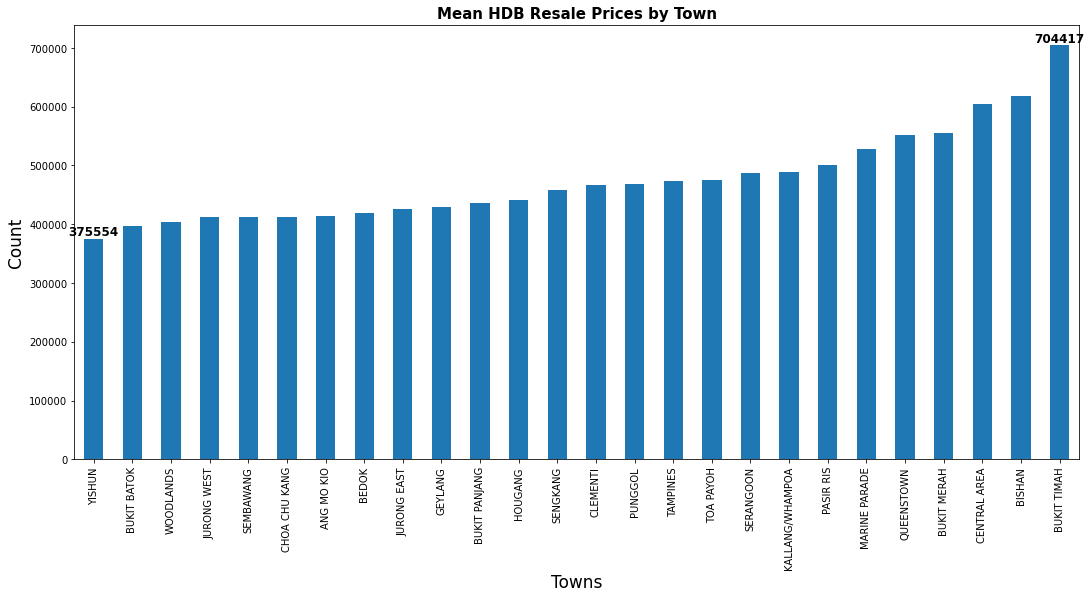

In [27]:
# Distribution of mean resale price by town
by_town = hdb.groupby(['town'])
by_town_mean = hdb.groupby(['town'])['resale_price'].mean().sort_values()
by_town_ct = hdb.groupby(['town'])['resale_price'].count().sort_values()

by_town_mean.plot(kind='bar',figsize=(18,8))
plt.title('Mean HDB Resale Prices by Town', fontsize=15, fontweight='bold')
plt.xlabel('Towns', fontsize=17)
plt.ylabel('Count', fontsize=17)

# Annotate the first and last bars
first_bar = by_town_mean.iloc[0]
last_bar = by_town_mean.iloc[-1]

plt.text(0, first_bar, f'{first_bar:.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(len(by_town_mean) - 1, last_bar, f'{last_bar:.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

**Interpretation**: The chart shows that there is slight increase in the mean resale price across towns. However, at the extreme ends, the mean resale price for Bukit Timah is nearly twice that of Yishun.

Text(0, 0.5, 'Count')

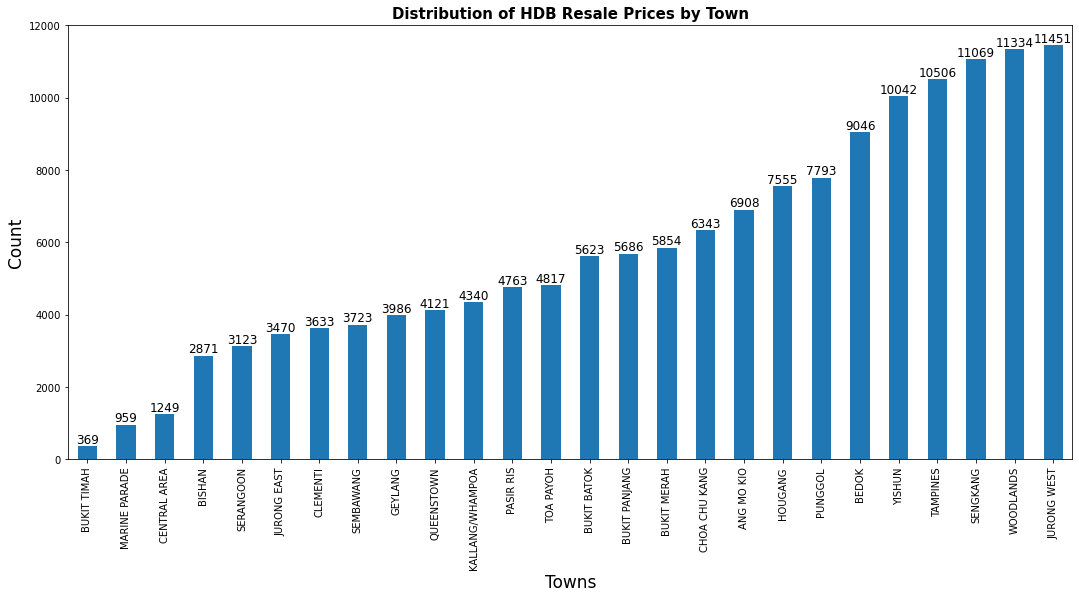

In [40]:
by_town= hdb.groupby(['town'])

by_town_ct = hdb.groupby(['town'])['resale_price'].count().sort_values()
by_town_ct.plot(kind='bar',figsize=(18,8))

for i, town in enumerate(by_town_ct.index):
        count = by_town_ct[town]
        plt.annotate(f"{count}", (i, count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of HDB Resale Prices by Town', fontsize=15, fontweight='bold')
plt.xlabel('Towns', fontsize=17)
plt.ylabel('Count', fontsize=17)

**Interpretation**: Bukit Timah has the least number of resale flat units but the highest mean resale price. This shows that flats in Bukit Timah are able to consistently command high resale prices. Similarly, flats in the Central Area and Bishan are also able to draw high mean resale prices for the comparatively fewer number of flats sold.

### 4c. Examining Predictor Variable - Outliers

In [29]:
# Calculating upper and lower limits
q3, q1 = np.percentile(hdb['resale_price'], [75 ,25])
iqr = q3 - q1
lower_lim = q1-1.5*iqr
upper_lim = q3+1.5*iqr

print("Lower limit for outliers is: "+str(lower_lim))
print("Upper limit for outliers is: " +str(upper_lim))

# Find upper outliers - i.e. resale prices above 781000
# There are 4196 flats that are considered outliers
upper_outliers = hdb[hdb['resale_price']>781000]
upper_outliers.shape

Lower limit for outliers is: 87500.0
Upper limit for outliers is: 779500.0


(4971, 76)

In [30]:
# Finding proportion of outlier flats in each town
by_town_outlier = (upper_outliers['town'].value_counts()) / by_town_ct
by_town_outlier.sort_values(ascending=False)

BUKIT TIMAH        0.384824
CENTRAL AREA       0.297038
BISHAN             0.184605
QUEENSTOWN         0.176656
MARINE PARADE      0.157456
BUKIT MERAH        0.147079
TOA PAYOH          0.111065
KALLANG/WHAMPOA    0.081797
CLEMENTI           0.064960
SERANGOON          0.044188
GEYLANG            0.042649
ANG MO KIO         0.035466
JURONG EAST        0.016715
HOUGANG            0.013898
BEDOK              0.013044
TAMPINES           0.011041
WOODLANDS          0.003970
PASIR RIS          0.003359
BUKIT BATOK        0.003023
PUNGGOL            0.001412
BUKIT PANJANG      0.001231
YISHUN             0.001095
CHOA CHU KANG      0.000631
JURONG WEST        0.000087
SEMBAWANG               NaN
SENGKANG                NaN
dtype: float64

**Interpretation**: There are higher proportion of flats in the towns of Bukit Timah, Central Area, and Bishan that are considered upper outliers.

Exploring the distribution of HDB resale prices:

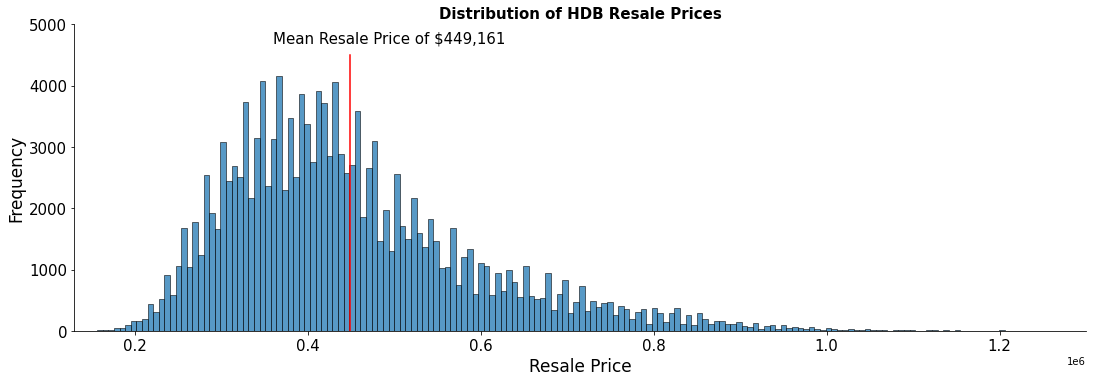

In [31]:
# examining spread of resale_price
# plotting histogram
sns.displot(hdb,x='resale_price', height=5,aspect=3)

# changing x and y labels and font size
plt.xlabel('Resale Price', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# adding marker for mean
plt.axvline(x=449162,ymax=0.9,color = 'r')
plt.text(360000,4700,'Mean Resale Price of $449,161',rotation=0, fontsize=15)

plt.xlim([130000,1300000])
plt.ylim([0,5000])

# chart title
plt.title('Distribution of HDB Resale Prices', fontsize=15, fontweight='bold')
plt.show()

**Interpretation**: There is a right skew in the distribution of HDB resale prices, meaning that there are a small number of HDB flats being sold at higher end prices. When the predictor variable is skewed, the model will be less likely to successfully predict the price for the most expensive houses since it is trained on a large number of moderately priced homes. One possible way to address the skew is to scale the values by taking its log.

[Back to Contents](#Contents)

---
## <a name="Feature-Selection-and-Engineering"></a>5. Feature Selection and Engineering
---

### 5a. Removing Co-Linear Variables 

In [41]:
# Set our df to include only numerical variables, which is our intended test group
hdb_numerical = hdb[numerical]

In [33]:
# Identifying co-linearity for numerical variables, taking 0.9 as the threshold for co-linearity
hdb_numerical.corr()[hdb_numerical.corr() >= 0.9]

,id,floor_area_sqm,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor_area_sqm,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lease_commence_date,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.988912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_price,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tranc_year,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tranc_month,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mid_storey,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999423,0.999421,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lower,NaN,NaN,NaN,NaN,NaN,NaN,0.999423,1.000000,0.997688,0.999423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
upper,NaN,NaN,NaN,NaN,NaN,NaN,0.999421,0.997688,1.000000,0.999421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mid,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999423,0.999421,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Co-linear variables identified**:
* 'floor_area_sqm' and 'floor_area_sqft'
* 'lease_commence_date' and 'year_completed'
* 'mid_storey', 'lower', 'upper' and 'mid'
* 'latitude','mrt_latitude','bus_stop_latitude','pri_sch_latitude','sec_sch_latitude'
* 'longitude','mrt_longitude','bus_stop_longitude','pri_sch_longitude','sec_sch_longitude'

We will drop 'floor_area_sqft' and 'mid', which is perfectly colinear with another variable in the set. We will test each remaining set of feature variables against resale price and keep the variable with highest linear relationship to our predictor (i.e. highest predictability power).

In [34]:
# Keep year_completed as it has a more linear relationship to the predictor
check_date = hdb_numerical[['resale_price','lease_commence_date','year_completed']]
check_date.corr()

,resale_price,lease_commence_date,year_completed
resale_price,1.000000,0.350337,0.353698
lease_commence_date,0.350337,1.000000,0.988912
year_completed,0.353698,0.988912,1.000000


In [35]:
# Keep upper as it has a more linear relationship to the predictor
check_storey = hdb_numerical[['resale_price','mid_storey','lower','upper']]
check_storey.corr()

,resale_price,mid_storey,lower,upper
resale_price,1.000000,0.353213,0.352466,0.353552
mid_storey,0.353213,1.000000,0.999423,0.999421
lower,0.352466,0.999423,1.000000,0.997688
upper,0.353552,0.999421,0.997688,1.000000


In [36]:
# Keep sec_sch_latitude as it has a more linear relationship to the predictor
check_lat = hdb_numerical[['resale_price','latitude','mrt_latitude','bus_stop_latitude','pri_sch_latitude','sec_sch_latitude']]
check_lat.corr()

,resale_price,latitude,mrt_latitude,bus_stop_latitude,pri_sch_latitude,sec_sch_latitude
resale_price,1.000000,-0.216153,-0.214939,-0.215760,-0.214707,-0.216303
latitude,-0.216153,1.000000,0.992878,0.999819,0.997589,0.995945
mrt_latitude,-0.214939,0.992878,1.000000,0.992831,0.992300,0.990124
bus_stop_latitude,-0.215760,0.999819,0.992831,1.000000,0.997443,0.995787
pri_sch_latitude,-0.214707,0.997589,0.992300,0.997443,1.000000,0.994387
sec_sch_latitude,-0.216303,0.995945,0.990124,0.995787,0.994387,1.000000


In [37]:
# Keep longitude as it has a more linear relationship to the predictor
check_long = hdb_numerical[['resale_price','longitude','mrt_longitude','bus_stop_longitude','pri_sch_longitude','sec_sch_longitude']]
check_long.corr()

,resale_price,longitude,mrt_longitude,bus_stop_longitude,pri_sch_longitude,sec_sch_longitude
resale_price,1.000000,0.106596,0.106506,0.106394,0.106681,0.108911
longitude,0.106596,1.000000,0.996590,0.999937,0.999227,0.998698
mrt_longitude,0.106506,0.996590,1.000000,0.996571,0.996255,0.996154
bus_stop_longitude,0.106394,0.999937,0.996571,1.000000,0.999172,0.998644
pri_sch_longitude,0.106681,0.999227,0.996255,0.999172,1.000000,0.998426
sec_sch_longitude,0.108911,0.998698,0.996154,0.998644,0.998426,1.000000


In [ ]:
# Dropping columns with colinear variables
# Dropping tranc_year and tranc_month is derivative from tranc_yearmonth

drop_columns = ['floor_area_sqft','mid','lease_commence_date','mid_storey',
         'lower','latitude','mrt_latitude','bus_stop_latitude','pri_sch_latitude',
         'mrt_longitude','bus_stop_longitude','pri_sch_longitude','sec_sch_longitude','tranc_year', 'tranc_month']

hdb_numerical.drop([drop_columns],axis=1,inplace=True)

In [47]:
# Printing current list of features
print(hdb_numerical.columns.tolist())
print(f"\nThe initial list of 74 variables has been reduced to {len(hdb_numerical.columns.tolist())-1}.")

['id', 'floor_area_sqm', 'resale_price', 'upper', 'hdb_age', 'max_floor_lvl', 'year_completed', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental', 'longitude', 'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance', 'bus_interchange', 'mrt_interchange', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation', 'sec_sch_nearest_dist', 'cutoff_point', 'affiliation', 'sec_sch_latitude']

The initial list of 74 variables has been reduced to 45.


### 5b. Checking For Linearity For Remaining Features and Predictors

In [49]:
# Re-order columns with Resale Price as index 0
first_column = hdb_numerical.pop('resale_price')
hdb_numerical.insert(0, 'resale_price', first_column)
hdb_numerical.corr().iloc[:1, :][abs(hdb_numerical.corr()) >= 0.3]

,resale_price,id,floor_area_sqm,upper,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude
resale_price,1.0,0.521504,0.65412,0.353552,-0.350337,0.49565,0.353698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.410368,NaN,0.359434,0.3375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


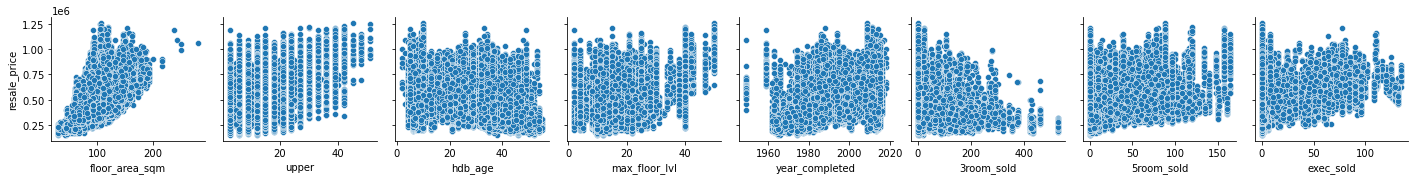

In [50]:
sns.pairplot(hdb_numerical, x_vars=['floor_area_sqm','upper','hdb_age','max_floor_lvl','year_completed',
                                   '3room_sold','5room_sold','exec_sold'], y_vars=['resale_price'])

**Interpretation**: Floor area has the strongest correlation with resale price as points are clearly clustered along a gradient. The correlation for the other features is moderate: points are clustered as columns or clusters that generally take a linear shape.

### 5c. Creating Interaction Terms

As HDB mentioned that "proximity to city or town centre" is one of the "factors that impact the market value of a new flat" (HDB, 2023), we are creating an interaction term, **"town_proxy"**, to determine the **squared distance** between the flat and the Singapore River.

The relative distance is derived using the Pythagoras Theorem as follows:

**c^2 = a^2 + b^2**

In this case,

**town_proxy = ((latitude - town_lat) ** 2) + ((longitude - town_long) ** 2) ** 0.5**

Given that the latitude and longitude of Singapore River is as follows:

In [ ]:
# Coordinates of the Singapore River, a reference point for the centre of Singapore
town_lat = 1.290160
town_long = 103.852000

# Reinstate latitude column
hdb_numerical['latitude'] = hdb['latitude']

# Create a new column for town_proxy
hdb_numerical['town_proxy'] = ((hdb_numerical['latitude'] - town_lat) ** 2) + ((hdb_numerical['longitude'] - town_long) ** 2)

# Drop sec_sch_latitude which was found to be colinear
hdb_numerical.drop(['sec_sch_latitude'],axis=1,inplace=True)

Checking town_proxy feature for linearity against resale_price and collinearity with the other features:

In [53]:
# Check correlation with resale_price
hdb_numerical[['resale_price', 'town_proxy']].corr()

,resale_price,town_proxy
resale_price,1.000000,-0.235363
town_proxy,-0.235363,1.000000


In [54]:
# No collinearity with the other features found
hdb_numerical.corr()[hdb_numerical.corr() >= 0.9]

,resale_price,id,floor_area_sqm,upper,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,latitude,town_proxy
resale_price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor_area_sqm,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
upper,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hdb_age,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_floor_lvl,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_completed,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market_hawker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multistorey_carpark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Printing final list of features
print(hdb_numerical.columns.tolist())
print(f"\nThe final list has {len(hdb_numerical.columns.tolist())-1} variables.")

['resale_price', 'id', 'floor_area_sqm', 'upper', 'hdb_age', 'max_floor_lvl', 'year_completed', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental', 'longitude', 'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance', 'bus_interchange', 'mrt_interchange', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation', 'sec_sch_nearest_dist', 'cutoff_point', 'affiliation', 'latitude', 'town_proxy']

The final list has 46 variables.


In [57]:
# Exporting cleaned data
hdb.to_csv('../data/train_cleaned.csv', index=False)

[Back to Contents](#Contents)